In [1]:
import pandas as pd                   # data science essentials
import matplotlib.pyplot as plt       # essential graphical output
import seaborn as sns                 # enhanced graphical output
import statsmodels.formula.api as smf # regression modeling

file = 'Apprentice_Chef_Dataset.xlsx'

original_df = pd.read_excel(file) # reading in the dataset

In [2]:
original_df.columns # understanding the features of the dataset

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME',
       'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
       'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',
       'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
       'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS',
       'PC_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
       'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT',
       'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED',
       'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED'],
      dtype='object')

In [3]:
original_df.head(n=10) # getting an initial look at the dataset

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,...,2,1,0,90,165.8,6,1,3,11,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,...,4,1,0,90,150.5,4,1,3,13,90
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,...,0,0,0,80,99.6,3,0,3,12,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,...,4,0,0,90,125.0,3,0,3,13,0
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,...,4,1,0,90,135.3,3,1,3,13,253
5,1250.0,1,Aegor Rivers,aegor.rivers@gmail.com,Aegor,Rivers,57,4,6,2,...,5,0,0,70,91.2,3,1,2,17,0
6,4665.0,1,Aelinor Penrose,aelinor.penrose@homedepot.com,Aelinor,Penrose,106,3,10,8,...,3,0,0,70,263.3,6,2,4,10,705
7,1690.0,1,Aemma Arryn,aemma.arryn@yahoo.com,Aemma,Arryn,122,6,8,10,...,3,0,0,70,160.0,5,1,3,13,0
8,1710.0,1,Aemon Rivers,aemon.rivers@caterpillar.com,Aemon,Rivers,46,4,5,10,...,10,1,1,70,170.1,4,2,3,12,0
9,1770.0,1,Aggar,aggar@protonmail.com,Aggar,Aggar,58,4,6,5,...,7,1,1,90,191.3,7,1,3,12,0


In [4]:
original_df.info() # from this, I can tell that there are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 29 columns):
REVENUE                         1946 non-null float64
CROSS_SELL_SUCCESS              1946 non-null int64
NAME                            1946 non-null object
EMAIL                           1946 non-null object
FIRST_NAME                      1946 non-null object
FAMILY_NAME                     1899 non-null object
TOTAL_MEALS_ORDERED             1946 non-null int64
UNIQUE_MEALS_PURCH              1946 non-null int64
CONTACTS_W_CUSTOMER_SERVICE     1946 non-null int64
PRODUCT_CATEGORIES_VIEWED       1946 non-null int64
AVG_TIME_PER_SITE_VISIT         1946 non-null float64
MOBILE_NUMBER                   1946 non-null int64
CANCELLATIONS_BEFORE_NOON       1946 non-null int64
CANCELLATIONS_AFTER_NOON        1946 non-null int64
TASTES_AND_PREFERENCES          1946 non-null int64
MOBILE_LOGINS                   1946 non-null int64
PC_LOGINS                       1946 non-null int64
W

In [5]:
original_df.loc[:, :].quantile([0.20,
                         0.40,
                         0.60,
                         0.80,
                         1.00])  # getting an idea of the distribution of data

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,...,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0.2,1285.00,0.0,35.0,3.0,5.0,2.0,61.58,1.0,0.0,0.0,...,1.0,0.0,0.0,10.0,108.6,3.0,0.0,2.0,12.0,0.0
0.4,1558.00,1.0,51.0,4.0,6.0,4.0,86.51,1.0,1.0,0.0,...,2.0,0.0,0.0,20.0,134.4,4.0,0.0,3.0,13.0,0.0
0.6,1910.00,1.0,71.0,6.0,7.0,6.0,102.62,1.0,1.0,0.0,...,3.0,0.0,0.0,40.0,156.7,5.0,1.0,3.0,14.0,28.0
0.8,2895.00,1.0,106.0,7.0,9.0,9.0,123.80,1.0,2.0,0.0,...,5.0,1.0,0.0,70.0,183.8,6.0,1.0,3.0,16.0,210.0
1.0,8793.75,1.0,493.0,19.0,18.0,10.0,1645.60,1.0,13.0,3.0,...,19.0,1.0,1.0,90.0,564.2,11.0,3.0,5.0,19.0,1600.0


In [6]:
original_df.loc[:,'REVENUE':'CANCELLATIONS_AFTER_NOON'].describe().round(2) 
# looking at descriptive statistics of first half of data to categorize

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17
std,1138.29,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43
min,131.00,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00
25%,1350.00,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00
50%,1740.00,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00
75%,2670.00,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00
max,8793.75,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00


In [7]:
original_df.loc[:,'TASTES_AND_PREFERENCES':].describe().round(2) 
# looking at descriptive statistics of second half of data to categorize 

,TASTES_AND_PREFERENCES,MOBILE_LOGINS,PC_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,0.71,5.52,1.48,11.33,1.49,2.97,0.36,0.11,35.41,150.56,4.44,0.60,2.79,13.51,106.43
std,0.45,0.58,0.53,13.57,2.32,2.74,0.48,0.32,26.58,49.45,1.55,0.64,0.76,2.33,181.01
min,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,33.40,0.00,0.00,1.00,5.00,0.00
25%,0.00,5.00,1.00,1.00,0.00,1.00,0.00,0.00,10.00,114.40,3.00,0.00,2.00,12.00,0.00
50%,1.00,6.00,1.00,7.00,0.00,2.00,0.00,0.00,30.00,145.60,4.00,1.00,3.00,13.00,0.00
75%,1.00,6.00,2.00,13.00,3.00,4.00,1.00,0.00,60.00,173.78,5.00,1.00,3.00,15.00,174.00
max,1.00,7.00,3.00,52.00,9.00,19.00,1.00,1.00,90.00,564.20,11.00,3.00,5.00,19.00,1600.00


In [8]:
## Categorization of data 

"""
# CONTINUOUS OR INTERVAL

REVENUE
AVG_TIME_PER_SITE_VISIT
AVG_PREP_VID_TIME
AVG_CLICKS_PER_VISIT
FOLLOWED_RECOMMENDATIONS_PCT


# BINARY

CROSS_SELL_SUCCESS
MOBILE_NUMBER
PACKAGE_LOCKER
REFRIGERATED_LOCKER
TASTES_AND_PREFERENCES


# COUNT

TOTAL_MEALS_ORDERED
UNIQUE_MEALS_PURCH
CONTACTS_W_CUSTOMER_SERVICE
PRODUCT_CATEGORIES_VIEWED
CANCELLATIONS_BEFORE_NOON
CANCELLATIONS_AFTER_NOON
MOBILE_LOGINS
PC_LOGINS
WEEKLY_PLAN
EARLY_DELIVERIES
LATE_DELIVERIES
LARGEST_ORDER_SIZE
MASTER_CLASSES_ATTENDED
TOTAL_PHOTOS_VIEWED


# DISCRETE
LARGEST_ORDER_SIZE
MEDIAN_MEAL_RATING
"""

'\n# CONTINUOUS OR INTERVAL\n\nREVENUE\nAVG_TIME_PER_SITE_VISIT\nAVG_PREP_VID_TIME\nAVG_CLICKS_PER_VISIT\nFOLLOWED_RECOMMENDATIONS_PCT\n\n\n# BINARY\n\nCROSS_SELL_SUCCESS\nMOBILE_NUMBER\nPACKAGE_LOCKER\nREFRIGERATED_LOCKER\nTASTES_AND_PREFERENCES\n\n\n# COUNT\n\nTOTAL_MEALS_ORDERED\nUNIQUE_MEALS_PURCH\nCONTACTS_W_CUSTOMER_SERVICE\nPRODUCT_CATEGORIES_VIEWED\nCANCELLATIONS_BEFORE_NOON\nCANCELLATIONS_AFTER_NOON\nMOBILE_LOGINS\nPC_LOGINS\nWEEKLY_PLAN\nEARLY_DELIVERIES\nLATE_DELIVERIES\nLARGEST_ORDER_SIZE\nMASTER_CLASSES_ATTENDED\nTOTAL_PHOTOS_VIEWED\n\n\n# DISCRETE\nLARGEST_ORDER_SIZE\nMEDIAN_MEAL_RATING\n'

In [9]:
# Obtaining counts of binary variables to further understand the data:

print(f"""

{original_df['CROSS_SELL_SUCCESS'].value_counts().sort_index()}


{original_df['MOBILE_NUMBER'].value_counts().sort_index()}


{original_df['PACKAGE_LOCKER'].value_counts().sort_index()}


{original_df['REFRIGERATED_LOCKER'].value_counts().sort_index()}


{original_df['TASTES_AND_PREFERENCES'].value_counts().sort_index()}


{original_df['CANCELLATIONS_AFTER_NOON'].value_counts().sort_index()}
""")



0     625
1    1321
Name: CROSS_SELL_SUCCESS, dtype: int64


0     238
1    1708
Name: MOBILE_NUMBER, dtype: int64


0    1255
1     691
Name: PACKAGE_LOCKER, dtype: int64


0    1726
1     220
Name: REFRIGERATED_LOCKER, dtype: int64


0     556
1    1390
Name: TASTES_AND_PREFERENCES, dtype: int64


0    1667
1     238
2      38
3       3
Name: CANCELLATIONS_AFTER_NOON, dtype: int64



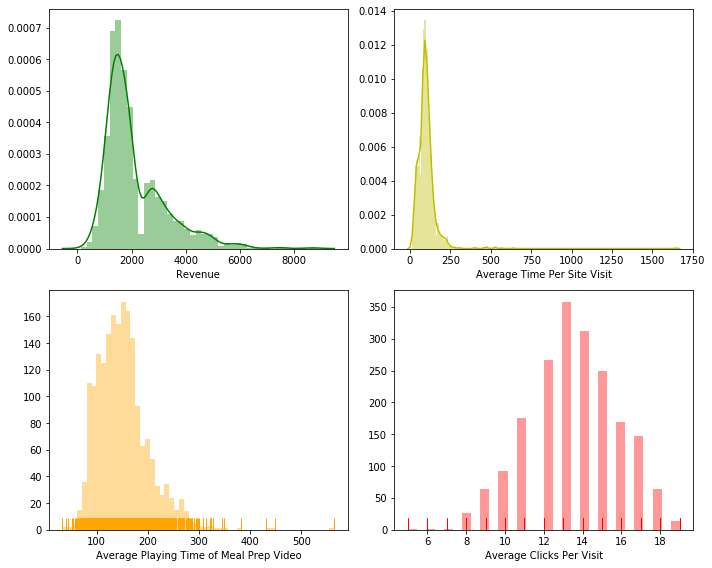

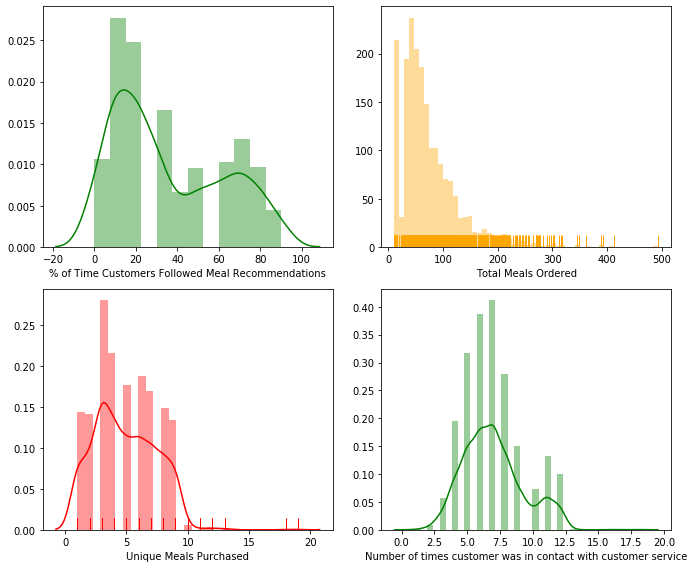

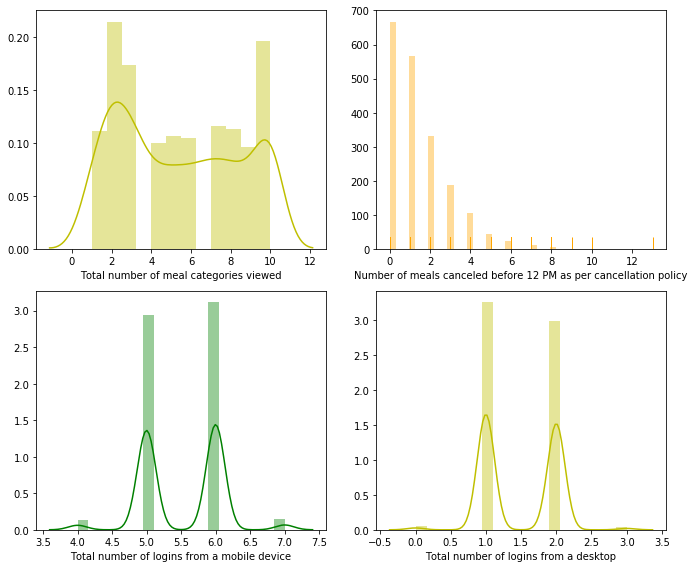

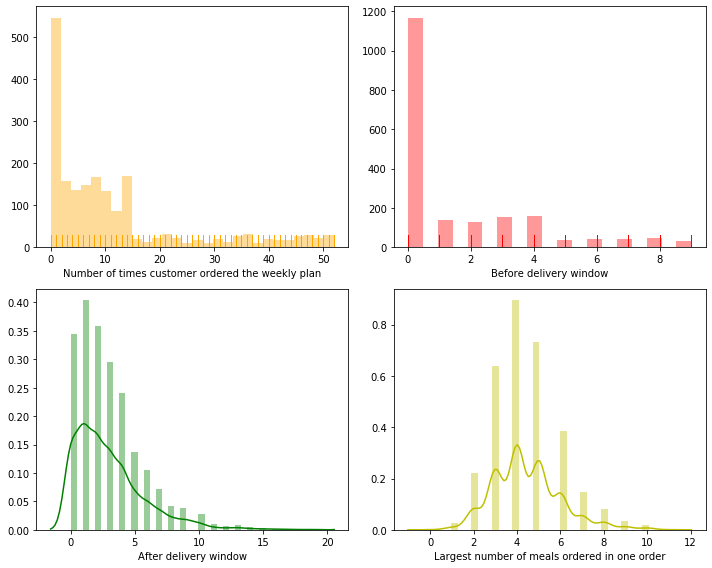

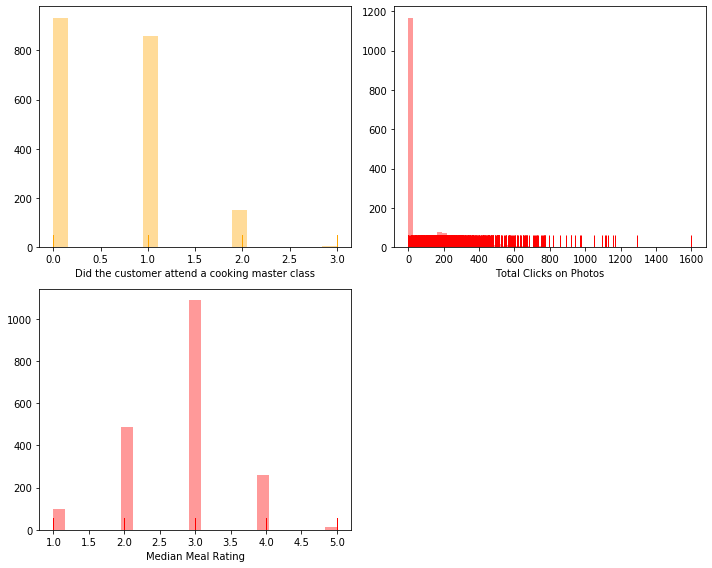

In [10]:
########################################
# Exploratory data analysis (Histograms)
########################################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['REVENUE'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('Revenue')

#######################################

plt.subplot(2, 2, 2)
sns.distplot(original_df['AVG_TIME_PER_SITE_VISIT'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Average Time Per Site Visit')

#######################################

plt.subplot(2, 2, 3)
sns.distplot(original_df['AVG_PREP_VID_TIME'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('Average Playing Time of Meal Prep Video')

#######################################

plt.subplot(2, 2, 4)
sns.distplot(original_df['AVG_CLICKS_PER_VISIT'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('Average Clicks Per Visit')
plt.tight_layout()
plt.show()

#######################################
#######################################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['FOLLOWED_RECOMMENDATIONS_PCT'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('% of Time Customers Followed Meal Recommendations')

#######################################

plt.subplot(2, 2, 2)
sns.distplot(original_df['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('Total Meals Ordered')

#######################################

plt.subplot(2, 2, 3)
sns.distplot(original_df['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             kde   = True,
             rug   = True,
             color = 'r')
plt.xlabel('Unique Meals Purchased')

#######################################

plt.subplot(2, 2, 4)
sns.distplot(original_df['CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('Number of times customer was in contact with customer service')
plt.tight_layout()
plt.show()

#######################################
#######################################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['PRODUCT_CATEGORIES_VIEWED'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Total number of meal categories viewed')

#######################################

plt.subplot(2, 2, 2)
sns.distplot(original_df['CANCELLATIONS_BEFORE_NOON'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('Number of meals canceled before 12 PM as per cancellation policy')

#######################################

plt.subplot(2, 2, 3)
sns.distplot(original_df['MOBILE_LOGINS'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('Total number of logins from a mobile device')

#######################################

plt.subplot(2, 2, 4)
sns.distplot(original_df['PC_LOGINS'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Total number of logins from a desktop')
plt.tight_layout()
plt.show()

#######################################
#######################################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['WEEKLY_PLAN'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('Number of times customer ordered the weekly plan')

#######################################

plt.subplot(2, 2, 2)
sns.distplot(original_df['EARLY_DELIVERIES'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('Before delivery window')

#######################################

plt.subplot(2, 2, 3)
sns.distplot(original_df['LATE_DELIVERIES'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('After delivery window')

#######################################

plt.subplot(2, 2, 4)
sns.distplot(original_df['LARGEST_ORDER_SIZE'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('Largest number of meals ordered in one order')
plt.tight_layout()
plt.show()

#######################################
#######################################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['MASTER_CLASSES_ATTENDED'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('Did the customer attend a cooking master class')

#######################################

plt.subplot(2, 2, 2)
sns.distplot(original_df['TOTAL_PHOTOS_VIEWED'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('Total Clicks on Photos')

#######################################

plt.subplot(2, 2, 3)
sns.distplot(original_df['MEDIAN_MEAL_RATING'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('Median Meal Rating')
plt.tight_layout()
plt.show()

#######################################
#######################################

In [11]:
# Setting outlier thresholds:

REVENUE_hi = 2250
AVG_TIME_PER_SITE_VISIT_hi = 250
AVG_PREP_VID_TIME_lo = 50
AVG_PREP_VID_TIME_hi = 275
AVG_CLICKS_PER_VISIT_lo = 8
AVG_CLICKS_PER_VISIT_hi = 20
FOLLOWED_RECOMMENDATIONS_PCT_hi = 50
TOTAL_MEALS_ORDERED_hi = 150
UNIQUE_MEALS_PURCH_hi = 9
CONTACTS_W_CUSTOMER_SERVICE_hi = 12
PRODUCT_CATEGORIES_VIEWED_lo = 1
PRODUCT_CATEGORIES_VIEWED_hi = 10
CANCELLATIONS_BEFORE_NOON_hi = 7
MOBILE_LOGINS_lo = 4.5
MOBILE_LOGINS_hi = 6.5
PC_LOGINS_lo = 1
PC_LOGINS_hi = 2
WEEKLY_PLAN_hi = 20
EARLY_DELIVERIES_hi = 5
LATE_DELIVERIES_hi = 10
LARGEST_ORDER_SIZE_lo = 1
LARGEST_ORDER_SIZE_hi = 7
MASTER_CLASSES_ATTENDED_hi = 2
TOTAL_PHOTOS_VIEWED_hi = 600
MEDIAN_MEAL_RATING_hi = 4

In [12]:
## Feature Engineering (outlier thresholds)

# Developing features (columns) for outliers:

#Revenue
original_df['out_REVENUE'] = 0
condition_hi = original_df.loc[0:,'out_REVENUE'][original_df['REVENUE'] > REVENUE_hi]

original_df['out_REVENUE'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#AVG_TIME_PER_SITE_VISIT
original_df['out_AVG_TIME_PER_SITE_VISIT'] = 0
condition_hi = original_df.loc[0:,'out_AVG_TIME_PER_SITE_VISIT']\
                              [original_df['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_hi]

original_df['out_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#AVG_PREP_VID_TIME
original_df['out_AVG_PREP_VID_TIME'] = 0
condition_hi = original_df.loc[0:,'out_AVG_PREP_VID_TIME']\
                              [original_df['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_hi]
condition_lo = original_df.loc[0:,'out_AVG_PREP_VID_TIME']\
                              [original_df['AVG_PREP_VID_TIME'] < AVG_PREP_VID_TIME_lo]

original_df['out_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_AVG_PREP_VID_TIME'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

#AVG_CLICKS_PER_VISIT
original_df['out_AVG_CLICKS_PER_VISIT'] = 0
condition_hi = original_df.loc[0:,'out_AVG_CLICKS_PER_VISIT']\
                              [original_df['AVG_CLICKS_PER_VISIT'] > AVG_CLICKS_PER_VISIT_hi]
condition_lo = original_df.loc[0:,'out_AVG_CLICKS_PER_VISIT']\
                              [original_df['AVG_CLICKS_PER_VISIT'] < AVG_CLICKS_PER_VISIT_lo]

original_df['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

#FOLLOWED_RECOMMENDATIONS_PCT
original_df['out_FOLLOWED_RECOMMENDATIONS_PCT'] = 0
condition_hi = original_df.loc[0:,'out_FOLLOWED_RECOMMENDATIONS_PCT']\
                              [original_df['FOLLOWED_RECOMMENDATIONS_PCT'] > FOLLOWED_RECOMMENDATIONS_PCT_hi]

original_df['out_FOLLOWED_RECOMMENDATIONS_PCT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#TOTAL_MEALS_ORDERED
original_df['out_TOTAL_MEALS_ORDERED'] = 0
condition_hi = original_df.loc[0:,'out_TOTAL_MEALS_ORDERED']\
                              [original_df['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_hi]

original_df['out_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#UNIQUE_MEALS_PURCH
original_df['out_UNIQUE_MEALS_PURCH'] = 0
condition_hi = original_df.loc[0:,'out_UNIQUE_MEALS_PURCH']\
                              [original_df['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_hi]

original_df['out_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#CONTACTS_W_CUSTOMER_SERVICE
original_df['out_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition_hi = original_df.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE']\
                              [original_df['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_hi]

original_df['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#PRODUCT_CATEGORIES_VIEWED
original_df['out_PRODUCT_CATEGORIES_VIEWED'] = 0
condition_hi = original_df.loc[0:,'out_PRODUCT_CATEGORIES_VIEWED']\
                              [original_df['PRODUCT_CATEGORIES_VIEWED'] > PRODUCT_CATEGORIES_VIEWED_hi]
condition_lo = original_df.loc[0:,'out_PRODUCT_CATEGORIES_VIEWED']\
                              [original_df['PRODUCT_CATEGORIES_VIEWED'] < PRODUCT_CATEGORIES_VIEWED_lo]

original_df['out_PRODUCT_CATEGORIES_VIEWED'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_PRODUCT_CATEGORIES_VIEWED'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

#CANCELLATIONS_BEFORE_NOON
original_df['out_CANCELLATIONS_BEFORE_NOON'] = 0
condition_hi = original_df.loc[0:,'out_CANCELLATIONS_BEFORE_NOON']\
                              [original_df['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_hi]

original_df['out_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#MOBILE_LOGINS
original_df['out_MOBILE_LOGINS'] = 0
condition_hi = original_df.loc[0:,'out_MOBILE_LOGINS']\
                              [original_df['MOBILE_LOGINS'] > MOBILE_LOGINS_hi]
condition_lo = original_df.loc[0:,'out_MOBILE_LOGINS']\
                              [original_df['MOBILE_LOGINS'] < MOBILE_LOGINS_lo]

original_df['out_MOBILE_LOGINS'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_MOBILE_LOGINS'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

#PC_LOGINS
original_df['out_PC_LOGINS'] = 0
condition_hi = original_df.loc[0:,'out_PC_LOGINS']\
                              [original_df['PC_LOGINS'] > PC_LOGINS_hi]
condition_lo = original_df.loc[0:,'out_PC_LOGINS']\
                              [original_df['PC_LOGINS'] < PC_LOGINS_lo]

original_df['out_PC_LOGINS'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_PC_LOGINS'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

#WEEKLY_PLAN
original_df['out_WEEKLY_PLAN'] = 0
condition_hi = original_df.loc[0:,'out_WEEKLY_PLAN']\
                              [original_df['WEEKLY_PLAN'] > WEEKLY_PLAN_hi]

original_df['out_WEEKLY_PLAN'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#EARLY_DELIVERIES
original_df['out_EARLY_DELIVERIES'] = 0
condition_hi = original_df.loc[0:,'out_EARLY_DELIVERIES']\
                              [original_df['EARLY_DELIVERIES'] > EARLY_DELIVERIES_hi]

original_df['out_EARLY_DELIVERIES'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#LATE_DELIVERIES
original_df['out_LATE_DELIVERIES'] = 0
condition_hi = original_df.loc[0:,'out_LATE_DELIVERIES']\
                              [original_df['LATE_DELIVERIES'] > LATE_DELIVERIES_hi]

original_df['out_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#LARGEST_ORDER_SIZE
original_df['out_LARGEST_ORDER_SIZE'] = 0
condition_hi = original_df.loc[0:,'out_LARGEST_ORDER_SIZE']\
                              [original_df['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_hi]
condition_lo = original_df.loc[0:,'out_LARGEST_ORDER_SIZE']\
                              [original_df['PRODUCT_CATEGORIES_VIEWED'] < LARGEST_ORDER_SIZE_lo]

original_df['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

#MASTER_CLASSES_ATTENDED
original_df['out_MASTER_CLASSES_ATTENDED'] = 0
condition_hi = original_df.loc[0:,'out_MASTER_CLASSES_ATTENDED']\
                              [original_df['MASTER_CLASSES_ATTENDED'] > MASTER_CLASSES_ATTENDED_hi]

original_df['out_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#TOTAL_PHOTOS_VIEWED
original_df['out_TOTAL_PHOTOS_VIEWED'] = 0
condition_hi = original_df.loc[0:,'out_TOTAL_PHOTOS_VIEWED']\
                              [original_df['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_hi]

original_df['out_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

#MEDIAN_MEAL_RATING
original_df['out_MEDIAN_MEAL_RATING'] = 0
condition_hi = original_df.loc[0:,'out_MEDIAN_MEAL_RATING']\
                              [original_df['MEDIAN_MEAL_RATING'] > MEDIAN_MEAL_RATING_hi]

original_df['out_MEDIAN_MEAL_RATING'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

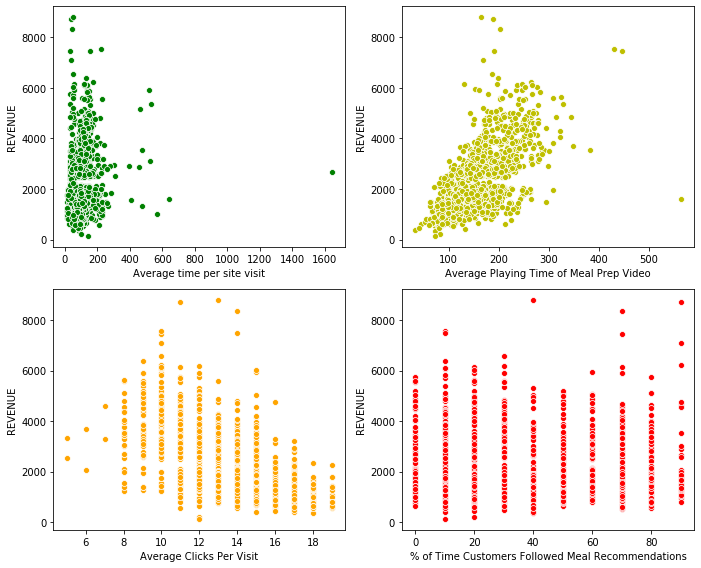

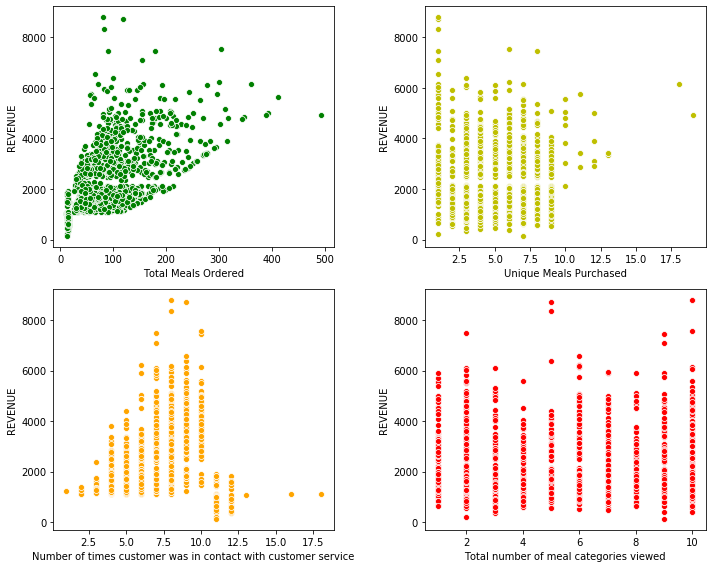

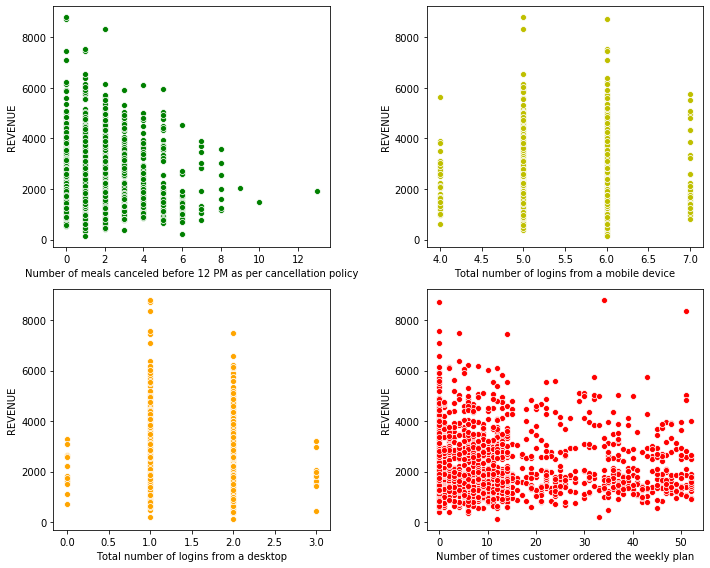

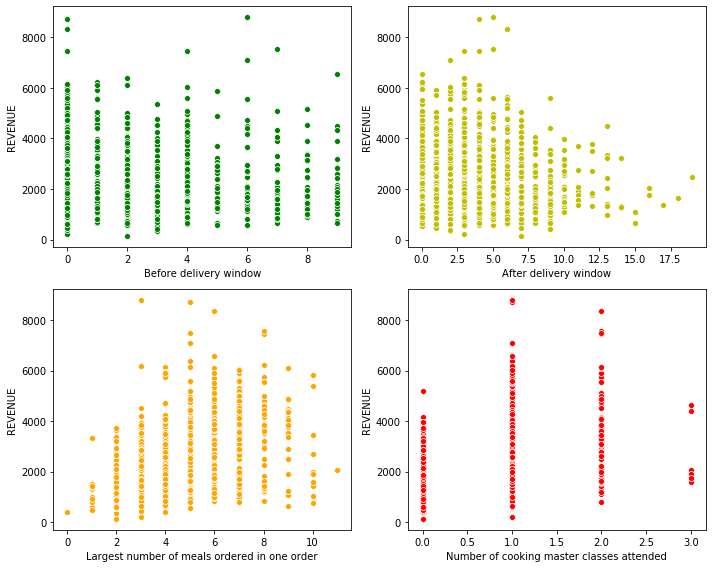

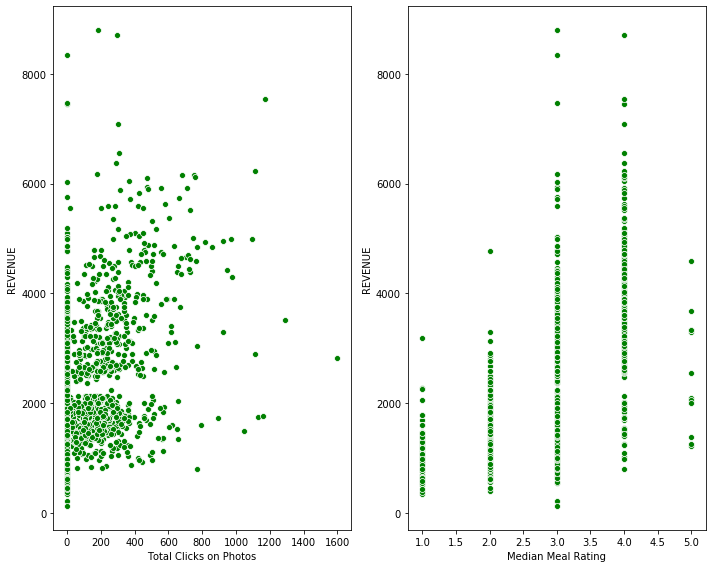

In [13]:
########################################
# Exploratory data analysis (Scatter)
########################################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['AVG_TIME_PER_SITE_VISIT'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('Average time per site visit')

#######################################

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['AVG_PREP_VID_TIME'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('Average Playing Time of Meal Prep Video')

#######################################

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['AVG_CLICKS_PER_VISIT'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('Average Clicks Per Visit')

#######################################

plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['FOLLOWED_RECOMMENDATIONS_PCT'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('% of Time Customers Followed Meal Recommendations')
plt.tight_layout()

plt.savefig('Apprentice Chef Data Scatterplots 1 of 5.png')
plt.show()

#######################################
#######################################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['TOTAL_MEALS_ORDERED'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('Total Meals Ordered')

#######################################

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['UNIQUE_MEALS_PURCH'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('Unique Meals Purchased')

#######################################

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['CONTACTS_W_CUSTOMER_SERVICE'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('Number of times customer was in contact with customer service')

#######################################

plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['PRODUCT_CATEGORIES_VIEWED'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('Total number of meal categories viewed')
plt.tight_layout()

plt.savefig('Apprentice Chef Data Scatterplots 2 of 5.png')
plt.show()

#######################################
#######################################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['CANCELLATIONS_BEFORE_NOON'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('Number of meals canceled before 12 PM as per cancellation policy')

#######################################

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['MOBILE_LOGINS'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('Total number of logins from a mobile device')

#######################################

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['PC_LOGINS'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('Total number of logins from a desktop')

#######################################

plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['WEEKLY_PLAN'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('Number of times customer ordered the weekly plan')
plt.tight_layout()

plt.savefig('Apprentice Chef Data Scatterplots 3 of 5.png')
plt.show()

#######################################
#######################################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['EARLY_DELIVERIES'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('Before delivery window')

#######################################

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['LATE_DELIVERIES'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('After delivery window')

#######################################

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['LARGEST_ORDER_SIZE'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('Largest number of meals ordered in one order')

#######################################

plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['MASTER_CLASSES_ATTENDED'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('Number of cooking master classes attended')
plt.tight_layout()

plt.savefig('Apprentice Chef Data Scatterplots 4 of 5.png')
plt.show()

#######################################
#######################################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(x = original_df['TOTAL_PHOTOS_VIEWED'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('Total Clicks on Photos')

#######################################

plt.subplot(1, 2, 2)
sns.scatterplot(x = original_df['MEDIAN_MEAL_RATING'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('Median Meal Rating')
plt.tight_layout()

plt.savefig('Apprentice Chef Data Scatterplots 5 of 5.png')
plt.show()

#######################################
#######################################

In [30]:
import numpy as np

# Creating new columns
original_df['log_REVENUE'] = np.log(original_df['REVENUE'])


# Setting trend-based thresholds 
AVG_TIME_PER_SITE_VISIT_change_hi = 200
AVG_PREP_VID_TIME_change_hi = 250
CONTACTS_W_CUSTOMER_SERVICE_change_hi = 10
TOTAL_MEALS_ORDERED_change_hi = 25 


# Feature Engineering:

original_df['change_AVG_TIME_PER_SITE_VISIT'] = 0
condition = original_df.loc[0:,'change_AVG_TIME_PER_SITE_VISIT']\
            [original_df['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_change_hi]

original_df['change_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

original_df['change_AVG_PREP_VID_TIME'] = 0
condition = original_df.loc[0:,'change_AVG_PREP_VID_TIME']\
            [original_df['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_change_hi]

original_df['change_AVG_PREP_VID_TIME'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

original_df['change_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition = original_df.loc[0:,'change_CONTACTS_W_CUSTOMER_SERVICE']\
            [original_df['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_change_hi]

original_df['change_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

original_df['change_TOTAL_MEALS_ORDERED'] = 0
condition = original_df.loc[0:,'change_TOTAL_MEALS_ORDERED']\
            [original_df['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_change_hi]

original_df['change_TOTAL_MEALS_ORDERED'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)


# Setting change-at thresholds
TOTAL_PHOTOS_VIEWED_change_at = 0 # zero inflated
MEDIAN_MEAL_RATING_change_at_3 = 3
MEDIAN_MEAL_RATING_change_at_4 = 4

# Feature Engineering:

original_df['change_TOTAL_PHOTOS_VIEWED'] = 0
condition = original_df.loc[0:,'change_TOTAL_PHOTOS_VIEWED']\
            [original_df['TOTAL_PHOTOS_VIEWED'] == TOTAL_PHOTOS_VIEWED_change_at]

original_df['change_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

original_df['change_MEDIAN_MEAL_RATING_3'] = 0
condition = original_df.loc[0:,'change_MEDIAN_MEAL_RATING_3']\
            [original_df['MEDIAN_MEAL_RATING'] == MEDIAN_MEAL_RATING_change_at_3]

original_df['change_MEDIAN_MEAL_RATING_3'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)

original_df['change_MEDIAN_MEAL_RATING_4'] = 0
condition = original_df.loc[0:,'change_MEDIAN_MEAL_RATING_4']\
            [original_df['MEDIAN_MEAL_RATING'] == MEDIAN_MEAL_RATING_change_at_4]

original_df['change_MEDIAN_MEAL_RATING_4'].replace(to_replace = condition,
                                       value      = 1,
                                       inplace    = True)


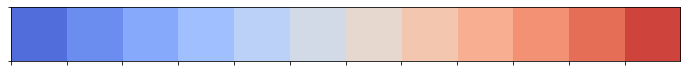

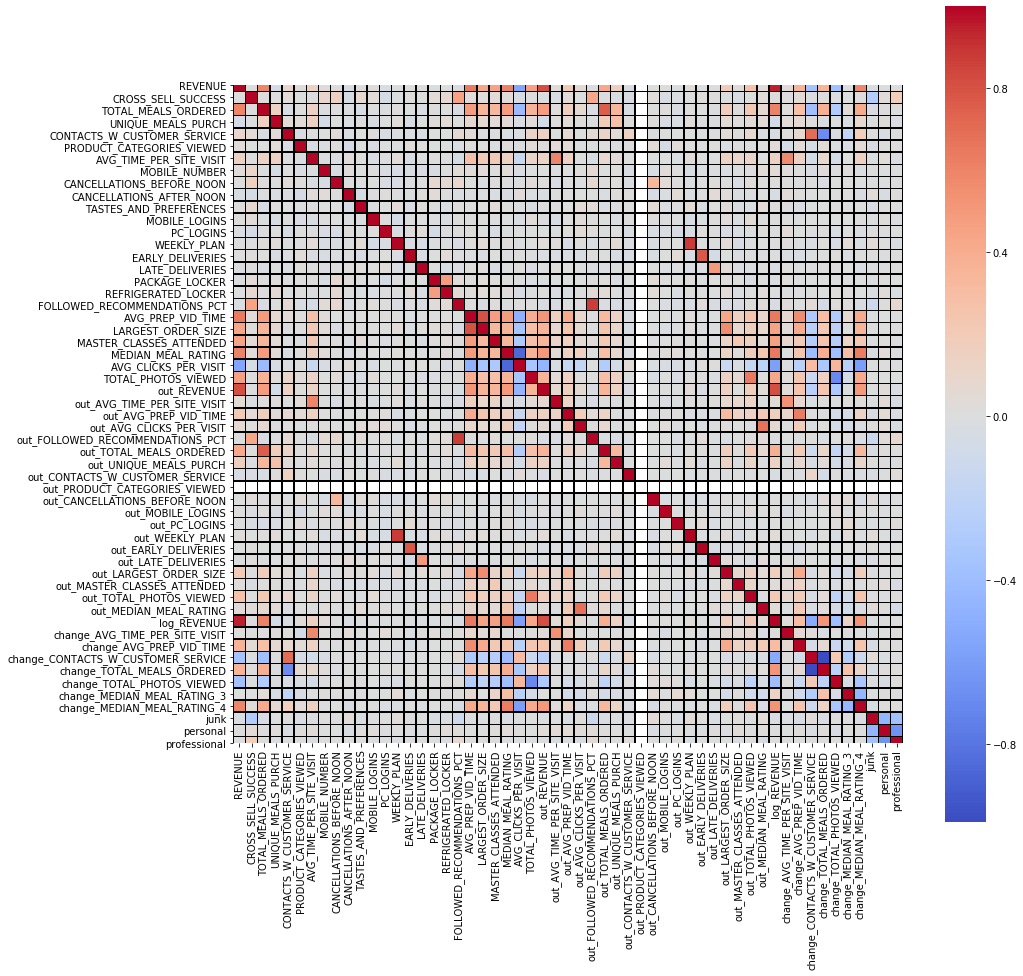

In [31]:
# Generating a heatmap to get a general overview of correlations

sns.palplot(sns.color_palette('coolwarm', 12))

df_corr = original_df.corr().round(2)

fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(df_corr,
            cmap = 'coolwarm',
            square = True,
            annot = False,
            linecolor = 'black',
            linewidths = 0.5)

plt.savefig('Apprentice Chef Correlation Heatmap.png')
plt.show()

# No conclusive correlations can be drawn 

In [32]:
# making a copy of Apprentice Chef dataset
original_df_explanatory = original_df.copy()

# dropping REVENUE and any text features from the explanatory variable set
original_df_explanatory = original_df.drop(['REVENUE', 'NAME', 'EMAIL',
                                           'FIRST_NAME', 'FAMILY_NAME', 
                                           'log_REVENUE', 'out_REVENUE'], 
                                            axis = 1)

# formatting each explanatory variable for statsmodels
for val in original_df_explanatory:
    print(f"original_df['{val}'] +")

original_df['CROSS_SELL_SUCCESS'] +
original_df['TOTAL_MEALS_ORDERED'] +
original_df['UNIQUE_MEALS_PURCH'] +
original_df['CONTACTS_W_CUSTOMER_SERVICE'] +
original_df['PRODUCT_CATEGORIES_VIEWED'] +
original_df['AVG_TIME_PER_SITE_VISIT'] +
original_df['MOBILE_NUMBER'] +
original_df['CANCELLATIONS_BEFORE_NOON'] +
original_df['CANCELLATIONS_AFTER_NOON'] +
original_df['TASTES_AND_PREFERENCES'] +
original_df['MOBILE_LOGINS'] +
original_df['PC_LOGINS'] +
original_df['WEEKLY_PLAN'] +
original_df['EARLY_DELIVERIES'] +
original_df['LATE_DELIVERIES'] +
original_df['PACKAGE_LOCKER'] +
original_df['REFRIGERATED_LOCKER'] +
original_df['FOLLOWED_RECOMMENDATIONS_PCT'] +
original_df['AVG_PREP_VID_TIME'] +
original_df['LARGEST_ORDER_SIZE'] +
original_df['MASTER_CLASSES_ATTENDED'] +
original_df['MEDIAN_MEAL_RATING'] +
original_df['AVG_CLICKS_PER_VISIT'] +
original_df['TOTAL_PHOTOS_VIEWED'] +
original_df['out_AVG_TIME_PER_SITE_VISIT'] +
original_df['out_AVG_PREP_VID_TIME'] +
original_df['out_AVG_CLICKS_PE

In [33]:
## Building a full model

# Blueprinting a model type:
lm_full = smf.ols(formula = """original_df['REVENUE'] ~ 
original_df['CROSS_SELL_SUCCESS'] +
original_df['TOTAL_MEALS_ORDERED'] +
original_df['UNIQUE_MEALS_PURCH'] +
original_df['CONTACTS_W_CUSTOMER_SERVICE'] +
original_df['PRODUCT_CATEGORIES_VIEWED'] +
original_df['AVG_TIME_PER_SITE_VISIT'] +
original_df['MOBILE_NUMBER'] +
original_df['CANCELLATIONS_BEFORE_NOON'] +
original_df['CANCELLATIONS_AFTER_NOON'] +
original_df['TASTES_AND_PREFERENCES'] +
original_df['MOBILE_LOGINS'] +
original_df['PC_LOGINS'] +
original_df['WEEKLY_PLAN'] +
original_df['EARLY_DELIVERIES'] +
original_df['LATE_DELIVERIES'] +
original_df['PACKAGE_LOCKER'] +
original_df['REFRIGERATED_LOCKER'] +
original_df['FOLLOWED_RECOMMENDATIONS_PCT'] +
original_df['AVG_PREP_VID_TIME'] +
original_df['LARGEST_ORDER_SIZE'] +
original_df['MASTER_CLASSES_ATTENDED'] +
original_df['MEDIAN_MEAL_RATING'] +
original_df['AVG_CLICKS_PER_VISIT'] +
original_df['TOTAL_PHOTOS_VIEWED'] +
original_df['out_AVG_TIME_PER_SITE_VISIT'] +
original_df['out_AVG_PREP_VID_TIME'] +
original_df['out_AVG_CLICKS_PER_VISIT'] +
original_df['out_FOLLOWED_RECOMMENDATIONS_PCT'] +
original_df['out_TOTAL_MEALS_ORDERED'] +
original_df['out_UNIQUE_MEALS_PURCH'] +
original_df['out_CONTACTS_W_CUSTOMER_SERVICE'] +
original_df['out_PRODUCT_CATEGORIES_VIEWED'] +
original_df['out_CANCELLATIONS_BEFORE_NOON'] +
original_df['out_MOBILE_LOGINS'] +
original_df['out_PC_LOGINS'] +
original_df['out_WEEKLY_PLAN'] +
original_df['out_EARLY_DELIVERIES'] +
original_df['out_LATE_DELIVERIES'] +
original_df['out_LARGEST_ORDER_SIZE'] +
original_df['out_MASTER_CLASSES_ATTENDED'] +
original_df['out_TOTAL_PHOTOS_VIEWED'] +
original_df['out_MEDIAN_MEAL_RATING'] +
original_df['change_AVG_TIME_PER_SITE_VISIT'] +
original_df['change_AVG_PREP_VID_TIME'] +
original_df['change_CONTACTS_W_CUSTOMER_SERVICE'] +
original_df['change_TOTAL_MEALS_ORDERED'] +
original_df['change_TOTAL_PHOTOS_VIEWED'] +
original_df['change_MEDIAN_MEAL_RATING_3'] +
original_df['change_MEDIAN_MEAL_RATING_4']""",
data = original_df)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     original_df['REVENUE']   R-squared:                       0.698
Model:                                OLS   Adj. R-squared:                  0.690
Method:                     Least Squares   F-statistic:                     91.22
Date:                    Mon, 27 Jan 2020   Prob (F-statistic):               0.00
Time:                            23:29:44   Log-Likelihood:                -15291.
No. Observations:                    1946   AIC:                         3.068e+04
Df Residuals:                        1897   BIC:                         3.095e+04
Df Model:                              48                                         
Covariance Type:                nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                           361.8593    465.055      0.778      0.437    -550.213    1273.932
original_df['CROSS_SELL_SUCCESS']                   -90.2923     35.956     -2.511      0.012    -160.811     -19.774
original_df['TOTAL_MEALS_ORDERED']                    3.0322      0.505      6.004      0.000       2.042       4.023
original_df['UNIQUE_MEALS_PURCH']                   -67.3012      6.148    -10.947      0.000     -79.359     -55.243
original_df['CONTACTS_W_CUSTOMER_SERVICE']          115.3797     10.589     10.896      0.000      94.613     136.147
original_df['PRODUCT_CATEGORIES_VIEWED']              3.7152      4.820      0.771      0.441      -5.738      13.168
original_df['AVG_TIME_PER_SITE_VISIT']               -0.8085      0.334     -2.423      0.015      -1.463      -0.154
original_df['MOBILE_NUMBER']                         35.0614     44.702      0.784      0.433     -52.609     122.732
original_df['CANCELLATIONS_BEFORE_NOON']              4.3180     10.157      0.425      0.671     -15.602      24.238
original_df['CANCELLATIONS_AFTER_NOON']             -51.8393     33.736     -1.537      0.125    -118.004      14.325
original_df['TASTES_AND_PREFERENCES']                33.3072     32.270      1.032      0.302     -29.982      96.596
original_df['MOBILE_LOGINS']                          1.6337     25.041      0.065      0.948     -47.477      50.744
original_df['PC_LOGINS']                            -26.3400     27.729     -0.950      0.342     -80.723      28.043
original_df['WEEKLY_PLAN']                           -3.3143      2.291     -1.446      0.148      -7.808       1.180
original_df['EARLY_DELIVERIES']                      -2.4827     10.025     -0.248      0.804     -22.144      17.178
original_df['LATE_DELIVERIES']                        4.9063      6.114      0.803      0.422      -7.084      16.896
original_df['PACKAGE_LOCKER']                       -25.9316     34.600     -0.749      0.454     -93.789      41.926
original_df['REFRIGERATED_LOCKER']                  -10.0595     52.452     -0.192      0.848    -112.930      92.811
original_df['FOLLOWED_RECOMMENDATIONS_PCT']           0.6197      1.122      0.552      0.581      -1.580       2.819
original_df['AVG_PREP_VID_TIME']                      8.3379      0.670     12.453      0.000       7.025       9.651
original_df['LARGEST_ORDER_SIZE']                  -107.7564     17.913     -6.015      0.000    -142.888     -72.624
original_df['MASTER_CLASSES_ATTENDED']              192.4722     27.120      7.097      0.000     139.284     245.661
original_df['MEDIAN_MEAL_RATING']                    46.9682     74.421      0.631      0

In [34]:
# placeholder list for the e-mail domains
placeholder_lst = []

# looping over each email address
for index, col in original_df.iterrows():
    
    # splitting email domain at '@'
    split_email = original_df.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)     

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)

In [35]:
# renaming columns
email_df.columns = ['concatenate' , 'email_domain']

# concatenating email_domain with Apprentice Chef DataFrame
original_df = pd.concat([original_df, email_df.loc[: ,'email_domain']],
                   axis = 1) # because we are concatenating by column

In [36]:
# creating email domains
professional_domains = ['@mmm.com', '@amex.com', '@apple.com', '@boeing.com',
                       '@caterpillar.com', '@chevron.com', '@cisco.com',
                       '@cocacola.com', '@disney.com','@dupont.com',
                       '@exxon.com', '@ge.org', '@goldmansacs.com',
                       '@homedepot.com', '@ibm.com', '@intel.com', '@jnj.com',
                       '@jpmorgan.com', '@mcdonalds.com', '@merck.com',
                       '@microsoft.com', '@nike.com', '@pfizer.com', '@pg.com',
                       '@travelers.com', '@unitedtech.com', '@unitedhealth.com',
                       '@verizon.com', '@visa.com', '@walmart.com']
personal_domains  = ['@gmail.com', '@yahoo.com', '@protonmail.com']
junk_domains = ['@me.com', '@aol.com', '@hotmail.com', '@live.com', '@msn.com',
                '@passport.com']

# placeholder list
placeholder_lst = []

# looping to group observations by domain type
for domain in original_df['email_domain']:
        if '@' + domain in professional_domains:
            placeholder_lst.append('professional')
        elif '@' + domain in personal_domains:
            placeholder_lst.append('personal')
        elif '@' + domain in junk_domains:
            placeholder_lst.append('junk')
        else:
            print('Unknown')


# concatenating with original DataFrame
original_df['domain_group'] = pd.Series(placeholder_lst)


# checking results
original_df['domain_group'].value_counts()

Unknown
Unknown


Series([], Name: domain_group, dtype: int64)

In [21]:
# One Hot encoding the categorical variable 'domain_group'

one_hot_domain_group = pd.get_dummies(original_df['domain_group'])

# dropping categorical variables after they've been encoded
original_df = original_df.drop('domain_group', axis = 1)

# joining codings together
original_df = original_df.join([one_hot_domain_group])

In [22]:
from sklearn.model_selection import train_test_split # train/test split
import sklearn.linear_model

# preparing explanatory variable data
original_df_data = original_df.drop(['REVENUE', 'out_REVENUE', 'log_REVENUE',
                                     'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 
                                     'email_domain'],
                                     axis = 1)


# preparing response variable data, and using logarithmic values of Revenue
original_df_target = original_df.loc[:, 'log_REVENUE']


# preparing training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
            original_df_data,
            original_df_target,
            test_size = 0.25,
            random_state = 222)

In [29]:
# Merging X_train and y_train so that they can be used in statsmodels
original_df_data = pd.concat([X_train, y_train], axis = 1)


# Building a refined model based on feature engineering:
lm_best = smf.ols(formula =  """log_REVENUE ~ 
original_df_data['TOTAL_MEALS_ORDERED'] +
original_df_data['UNIQUE_MEALS_PURCH'] +
original_df_data['CONTACTS_W_CUSTOMER_SERVICE'] +
original_df_data['AVG_TIME_PER_SITE_VISIT'] +
original_df_data['CANCELLATIONS_BEFORE_NOON'] +
original_df_data['CANCELLATIONS_AFTER_NOON'] +
original_df_data['WEEKLY_PLAN'] +
original_df_data['EARLY_DELIVERIES'] +
original_df_data['REFRIGERATED_LOCKER'] +
original_df_data['AVG_PREP_VID_TIME'] +
original_df_data['LARGEST_ORDER_SIZE'] +
original_df_data['MASTER_CLASSES_ATTENDED'] +
original_df_data['MEDIAN_MEAL_RATING'] +
original_df_data['out_AVG_TIME_PER_SITE_VISIT'] +
original_df_data['out_TOTAL_MEALS_ORDERED'] +
original_df_data['out_UNIQUE_MEALS_PURCH'] +
original_df_data['out_PRODUCT_CATEGORIES_VIEWED'] +
original_df_data['out_WEEKLY_PLAN'] +
original_df_data['out_LARGEST_ORDER_SIZE'] +
original_df_data['out_MASTER_CLASSES_ATTENDED'] +
original_df_data['out_MEDIAN_MEAL_RATING'] +
original_df_data['change_AVG_TIME_PER_SITE_VISIT'] +
original_df_data['change_AVG_PREP_VID_TIME'] +
original_df_data['change_CONTACTS_W_CUSTOMER_SERVICE'] +
original_df_data['change_TOTAL_PHOTOS_VIEWED'] +
original_df_data['change_MEDIAN_MEAL_RATING_4'] + 
original_df_data['junk'] +
original_df_data['professional'] +
original_df_data['personal']""",
                  data = original_df_data)

# Step 2: fit the model based on the data
results = lm_best.fit()

# Step 3: analyze the summary output
print(results.summary())                             

                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     160.3
Date:                Mon, 27 Jan 2020   Prob (F-statistic):               0.00
Time:                        22:35:59   Log-Likelihood:                 9.5134
No. Observations:                1459   AIC:                             36.97
Df Residuals:                    1431   BIC:                             185.0
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [24]:
# INSTANTIATING a model object for Linear Regression
lr = sklearn.linear_model.LinearRegression()

# FITTING to the training data
lr_fit = lr.fit(X_train, y_train)

# PREDICTING on new data
lr_pred = lr_fit.predict(X_test)

# SCORING the results
print('Training Score:', lr.score(X_train, y_train).round(4))
print('Testing Score:',  lr.score(X_test, y_test).round(4))

Training Score: 0.7545
Testing Score: 0.6881


In [25]:
# INSTANTIATING a model object for Ridge regression
ridge_model = sklearn.linear_model.Ridge(alpha=0.2)

# FITTING the training data
ridge_fit  = ridge_model.fit(X_train, y_train)

# PREDICTING on new data
ridge_pred = ridge_fit.predict(X_test)

# saving scoring data for future use
ridge_train_score = ridge_model.score(X_train, y_train).round(4)
ridge_test_score  = ridge_model.score(X_test, y_test).round(4)

print('Training Score:', ridge_train_score)
print('Testing Score:',  ridge_test_score)

Training Score: 0.7545
Testing Score: 0.6884


In [26]:
# INSTANTIATING a model object for Lasso regression
lasso_model = sklearn.linear_model.Lasso()

# FITTING the training data
lasso_fit = lasso_model.fit(X_train, y_train)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(X_test)


# saving scoring data for future use
lasso_train_score = lasso_model.score(X_train, y_train).round(4)
lasso_test_score  = lasso_model.score(X_test, y_test).round(4)


print('Training Score:', lasso_train_score)
print('Testing Score:',  lasso_test_score)

Training Score: 0.5513
Testing Score: 0.5211
